In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.getcwd()

'd:\\git_local_repository\\yangoos57\\ML\\Hands_On_Data_preprocessing_in_python\\Part3'

# Data transformation and Massaging

### Three reasons why data transforamtion needs.
1. Necessity : 몇몇 알고리즘은 numerical attributes만 사용가능다. 그럴경우 categorical attributes 를 numerical로 바꿔야한다.

2. Correctness : K-means 알고리즘과 같은 경우 Normalization을 하지 않은체로 실행한다면 scale이 큰 attribute에 더욱 가중치를 둔다.
3. Effectiveness : 데이터가 약간 다듬어 진다면 더 나은 결과를 산출할 수 있다.

### Normalization and standardization

1. Normalization : we need normalization when we need the range of all the attributes in a dataset to be equal. especially some algorithms,such as KNN, K-means, that use the distance between the data object are necessary.
   
   NA_(i) = A_(i) - min(A) / Max(A) - Min(A)

2. Standardization : we need the variance or the standard deviation of all the attributes to be equal. attribute들 끼리 비교할 때 deviation으로 통일해서 구분하는 방법이다.
   
   SA_(i) = A_(i) - mean(A) / std(A)

3. 두 방법 모두 거리로 값을 통일하는 듯. 대상을 통일시킬때 둘중 하나로 사용하면 되므로 둘다 써보고 효과가 좋은 방법으로 쓰는것을 권장함.

### Attribute 종류 변환하는 세가지 툴
1. Binary coding (C => N, when C is Nominal)

2. ranking trnasformation (C => N, when C is Nominal or Ordinal)
3. discretization(N => C)

![photo](./data/ch14/1.png)

In [6]:
report_df = pd.read_csv('data/ch14/WH Report_preprocessed.csv')
BM = report_df.year == 2019
report_df_2019 = report_df[BM]
report_df_2019.set_index('Name', inplace=True)


### Binary coding
get_dummies

In [8]:
bc_continent = pd.get_dummies(report_df_2019.Continent)
bc_continent.head(5)

,Africa,Antarctica,Asia,Europe,North America,Oceania,South America
Name,,,,,,,
Afghanistan,0,0,1,0,0,0,0
Albania,0,0,0,1,0,0,0
Algeria,1,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,1
Armenia,0,0,0,1,0,0,0


### Discretization

* 1번 방법

<AxesSubplot:xlabel='hoursPerWeek', ylabel='sex'>

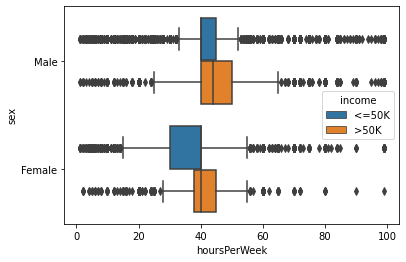

In [9]:
adult_df = pd.read_csv('data/ch14/adult.csv')
sns.boxplot(data=adult_df, y='sex', x='hoursPerWeek', hue='income')

In [10]:
adult_df['discretized_hoursPerWeek'] = adult_df.hoursPerWeek.apply(lambda v : '>40' if v>40 else ('40' if v==40 else '<40'))

<AxesSubplot:ylabel='sex,income'>

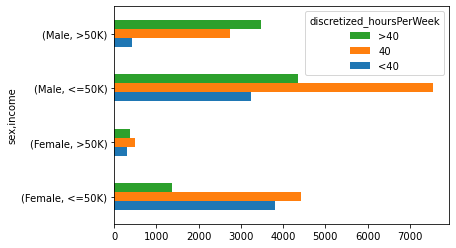

In [18]:
adult_df.groupby(['sex','income']).discretized_hoursPerWeek.value_counts().unstack()[['<40','40','>40']].plot.barh(legend='reverse')

* 2번 방법
  - pd.cut : equal index
  - pd.qcut : equal frequency

<AxesSubplot:>

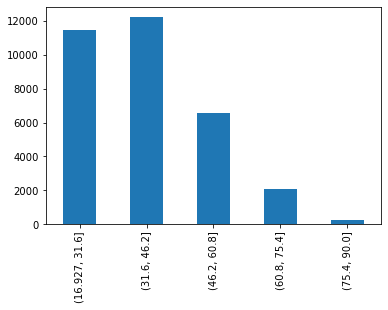

In [21]:
pd.cut(adult_df.age, bins = 5).value_counts().sort_index().plot.bar()

<AxesSubplot:>

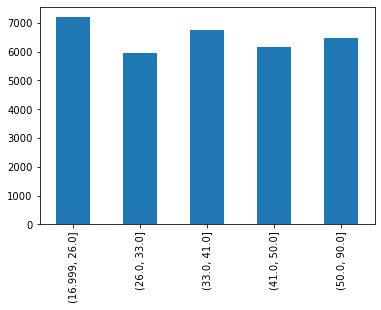

In [22]:
pd.qcut(adult_df.age, q = 5).value_counts().sort_index().plot.bar()

### How to find the optimum number for K ?
* Study the histogram of the numerical attribute you intend to discretize.

* Too many cut-off points are not desireable, as  one of the main reasons we would like to discretize a numerical attribute is to simplify it for our own consumption.
* Study the circumstantial facts and knowledge about the numerical attribute and see if the can lead you in the right direction.
* Experiment with a few ideas and study their pros and cons.

### Attribue construction
해당 방법은 categorical -> numerical attribute로 바꾸는데 활용된다. ranking transformation, binary coding과 다른 점은 새로운 attribute를 만드는데 있다. 

이를 위해 여러 attribute의 내용과 관련 attribute 에 관한 지식을 필요로 한다.

### Replace를 쓰면 바꾸고 싶은 value를 한번에 바꿀 수 있구나

In [31]:
person_df = pd.read_csv('data/ch14/500_Person_Gender_Height_Weight_Index.csv')
person_df.Index = person_df.Index.replace({0:'Extremely Weak', 1: 'Weak',2: 'Normal',3:'Overweight', 4:'Obesity',5:'ExtremeObesity'})
person_df.columns = ['Gender', 'Height', 'Weight', 'Condition']


### Style을 쓰면 차원 하나를 더 늘릴 수 있음!

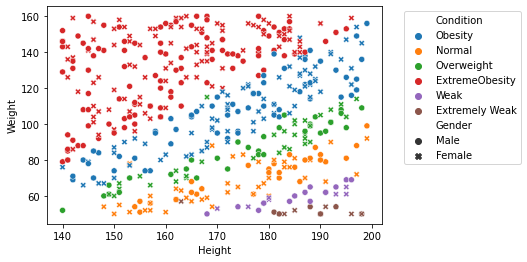

In [35]:
sns.scatterplot(data=person_df, x='Height', y='Weight', hue='Condition',style='Gender')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [36]:
person_df['BMI'] = person_df.apply(lambda r : r.Weight/((r.Height/100)**2), axis=1)

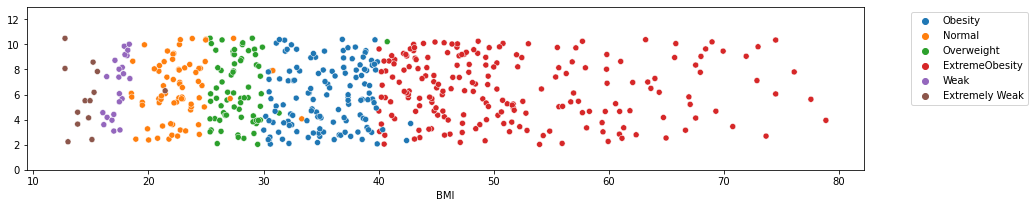

In [64]:
# [np.random.rand(3,10) for _ in range(len(person_df))]
# 10*np.random.rand(1,len(person_df))[0]
plt.figure(figsize=(15,3))
sns.scatterplot(x=person_df['BMI'], y=8.5*np.random.rand(1,len(person_df))[0]+2, hue=person_df['Condition'])
plt.ylim(0,13)
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()